In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud

# Analisis Exploratorio de Datos 

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
test_y = pd.read_csv("test_labels.csv")

In [3]:
pd.options.display.max_colwidth = 500

In [4]:
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27",0,0,0,0,0,0
1,000103f0d9cfb60f,"D'aww! He matches this background colour I'm seemingly stuck with. Thanks. (talk) 21:51, January 11, 2016 (UTC)",0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info.",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on improvement - I wondered if the section statistics should be later on, or a subsection of """"types of accidents"""" -I think the references may need tidying so that they are all in the exact same format ie date format etc. I can do that later on, if no-one else does first - if you have any preferences for formatting style on references or want to do it yourself please let me know.\n\nThere appears to be a backlog on articles for review so I guess t...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember what page that's on?",0,0,0,0,0,0


In [5]:
test.head()

,id,comment_text
0,00001cee341fdb12,"Yo bitch Ja Rule is more succesful then you'll ever be whats up with you and hating you sad mofuckas...i should bitch slap ur pethedic white faces and get you to kiss my ass you guys sicken me. Ja rule is about pride in da music man. dont diss that shit on him. and nothin is wrong bein like tupac he was a brother too...fuckin white boys get things right next time.,"
1,0000247867823ef7,"== From RfC == \n\n The title is fine as it is, IMO."
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lapland — / """
3,00017563c3f7919a,":If you have a look back at the source, the information I updated was the correct form. I can only guess the source hadn't updated. I shall update the information once again but thank you for your message."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [6]:
test_y.head()

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,-1,-1,-1,-1,-1,-1
1,0000247867823ef7,-1,-1,-1,-1,-1,-1
2,00013b17ad220c46,-1,-1,-1,-1,-1,-1
3,00017563c3f7919a,-1,-1,-1,-1,-1,-1
4,00017695ad8997eb,-1,-1,-1,-1,-1,-1


In [7]:
train[train["toxic"]==1].sample(n=5)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
59018,9e0c10583ffb1f05,the ass so you can see what it feels like!!!,1,0,1,0,0,0
111358,53d16753c044be2e,SHUT YOUR STUPID ASS UP NOW!!! GO GET YOUR GODDAMNED ADMINISTRATOR TO BLOCK ME SO I CAN COME BACK HERE AND START EDITING IN FIVE MINUTES!!! ACTUALLY JUST GO OUT AND GET PUT YOUR HEAD UNDERNEATH THE WHEEL OF A CAR YOU DUMB FUCKER AND THEN HAVE ROSEANNE BAR GET IN THE VEHICLE AND HIT THE GAS,1,1,1,0,1,0
29096,4d1e49e1906e7d5a,. That's right. You heard me.\n\nFAGGOT,1,0,1,0,1,0
11699,1ef097f8808fce67,burn in hell motherfucker,1,1,1,1,1,0
147257,3958c8e04f0ced6f,uhhhh YOU DON'T OWN THIS SITE. SO DON'T TOUCH MY ARTICLES.,1,0,0,0,0,0


In [8]:
train[train["severe_toxic"]==1].sample(n=5)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
14134,254c96e5b8f9214f,"""\n\n Fuck you \n\n Mother Fucker Mother fucker of a bitchMother fucker of a bitchMother fucker of a bitchMother fucker of a bitchMother fucker of a bitchMother fucker of a bitchMother fucker of a bitchMother fucker of a bitchMother fucker of a bitchMother fucker of a bitchMother fucker of a bitchMother fucker of a bitchMother fucker of a bitchMother fucker of a bitchMother fucker of a bitchMother fucker of a bitchMother fucker of a bitchMother fucker of a bitchMother fucker of a bitchMothe...",1,1,1,0,1,0
53408,8ecc71e2dd4e2fbe,BunkSteve is gay! BunkSteve is gay! BunkSteve is gay! BunkSteve is gay! BunkSteve is gay! BunkSteve is gay! BunkSteve is gay! BunkSteve is gay! BunkSteve is gay! BunkSteve is gay! BunkSteve is gay! BunkSteve is gay! BunkSteve is gay! BunkSteve is gay! BunkSteve is gay! BunkSteve is gay! BunkSteve is gay! BunkSteve is gay! BunkSteve is gay! BunkSteve is gay! BunkSteve is gay! BunkSteve is gay! BunkSteve is gay! BunkSteve is gay! BunkSteve is gay! BunkSteve is gay! BunkSteve is gay! BunkSteve ...,1,1,0,0,1,1
57714,9a6ff7868ef4563d,FUCK ALL YOU CAMEL JOCKEY PUSSY LICKING DINK LOOKING DICK SUCKERS!!!,1,1,1,0,1,0
26173,4540593cc30f385c,thanks cunt \n\nthanks for speedily deleting my john kerr page. if it ever happens again you will wake up looking down the barrel of a shotgun and then we will punch your nut sack till we hit concrete but if we are on any other surface uh oh for you!!!!!!!!!!!!!!!!!!,1,1,1,1,1,0
51970,8b1e6f64cd2e05df,"SMELL MY ARSE\n\nPROJECTILE VOMIT INTO MY GAPING ANUS, MY DIGUSTING SHIT FILLED CHEESY ANUS.",1,1,1,0,1,0


In [9]:
train[train["obscene"]==1].sample(n=5)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
146059,26484136969d618e,"SBC-YBR is an idiot who reverts things without checking on them\nHey idiot I know you have a hard-on for issuing corrections and warnings because you're a wikidick but check this http://en.wikipedia.org/wiki/Life_in_Hell nothing I supplied in the Akbar the Great article was at all unpublished or made up or whatever. Groening regularly names characters after figures in Indian history (see Apu, named after a character in a famous film triology). So I'm gonna revert it and I don't want to see y...",1,0,1,0,1,0
159378,fcb09a6d428bdb74,GO AHEAD AND FUCKING BAN ME ~ LIKE THAT WILL HELP. I HAVE A NEW IP AT THE DROP OF A HAT ON MY WIRELESS CARD. You are a sad group of people that allows people to harrass others without provocation. Hypocrite is correct. Don't say you'll help someone when it's a blatent lie. You want incivility ~ FUCK OFF YOU BUNCH OF BITCH CUNTS.,1,0,1,0,1,0
14369,25f4fcd8a1a6dc85,"""\nNeo Spirit Pro Wrestling buddy. I'm training under the name """"Kaine"""" which I ripped off of my buddy ImmortalKaine. Also, I'm pretty sure you can say Fuck on wikipedia as I've already fuckin said it 10 fuckin times you fucking moron. I've already filed an ANI report against you as you have created several accounts just for the purpose of starting flame wars. So you're too damn late. Also your aunt isn't Donna Goldsmith, retard. """,1,0,1,0,1,0
131315,be946165be641705,"Okay... I'll stop \n\nIf you can't see reason, then that's not my fault. \n\nYou want to keep that crappy page up for a fraud, and a loser who disparages good, hard-working pianists then go ahead. \n\nI guess Wikipedia really is going down the toilet. So fucking sad to see.",1,0,1,0,0,0
114883,6657264d2e57e7d4,"You Suck\n\nI despise you, you are a snobby, jerky Quinn who should be banned forever from editing.",1,0,1,0,1,0


In [10]:
train[train["threat"]==1].sample(n=5)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
62260,a69824b636591af8,and said he was going to kill me,1,0,0,1,0,0
61934,a5bcd8f646a90002,"orders\n\nDreamjerk has no right to order anyone to do anything. He is one of the more hated \nmembers of Wikipedia. Opponents just go on and do what you need to do.\n\nDaggers in back of Jack the Ripper, lubed by butter, falling on Rhobite.\n\nYou wanna play, we can play.\n\nButterknife.\n\n+++++++++++++++++**********************************",1,0,0,1,0,1
32684,57027f688fd64fee,YOU ARE A FUCKING NERD. GO KILL YOURSELF YOU NERD.,1,1,1,1,1,0
39864,6a6b16e9d691ee36,They are called Syed \nYou dirty chump.Muhajirs are the worst race on planet. If the world-peace will be achieved if muhajirs and jews leave this planet. Muhajirs should be hunted down like animals. They should DIE!!!! DIE MUHAJIRS DIE MUHAJIRS!,1,0,1,1,1,1
109649,4a8ee81410463ae4,"How about I cut off your ballz and send them to your girlfriend? \n\nI'm sure she'll like that.P.S.: Wait, do you even have a girlfriend?? Nevermind, I'll send them to your boyfriend.",1,0,0,1,1,0


In [11]:
train[train["insult"]==1].sample(n=5)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
120570,84fb6240be696c03,"You are a homo, \n\na big homo.",1,0,0,0,1,0
148906,53e137f40f67b14a,I used to be nice to all Wikipedians till the day I met Wikicology. He is a pest in my garden. A weed in my farm and a fucking virus in my system!,1,0,1,0,1,0
66117,b0cb25cb13be3ac5,"Are you stupid or what? Moron, if you block me you have only hurt the Wikipedia project, as I was trying to help remove some OBVIOUS BULLSHIT that even a reatarded grade school kid can tell is bullshit, from an article. Are all Wikipedia admins as stupid as you?",1,0,1,0,1,0
11873,1f6fe392b4431a32,"Stop undoing legitimate edits! \n\nIt is a FACT that Pam Bondi is ignoring the will of the voters of Florida, you piece of shit! Stop revising legitimate edits because of your political bias!",1,0,1,0,1,0
16022,2a435a00e0e2fd45,"bitch, asshole, motherfucker, go fuck ur mothers cunt, trade ur wife sister",1,1,1,0,1,0


In [12]:
train[train["identity_hate"]==1].sample(n=5)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
147736,40f1aad06068e680,"Deaf culture is full of a bunch of jerks \nWho want to ruin the lives of children by assuring that they have a disability. A lesbian couple wanted to make sure their donor was deaf, just to be absolutely sure that their child would have a disability. That is creepy. Deafness is not a culture, it is a disability that causes big disadvantages. It relates more to blindness, than being black or asian. Only a really stupid person wouldn't see that. This article should make that clear, and not pre...",1,0,0,0,1,1
157243,daf5329d788f31c3,You stupid nigger \n\nYou stupid nigger You stupid nigger You stupid nigger You stupid nigger You stupid nigger You stupid nigger You stupid nigger You stupid nigger\nYou stupid nigger You stupid nigger You stupid nigger You stupid nigger You stupid nigger You stupid nigger You stupid nigger You stupid nigger\nYou stupid nigger You stupid nigger You stupid nigger You stupid nigger You stupid nigger You stupid nigger You stupid nigger You stupid nigger\nYou stupid nigger You stupid nigger You...,1,1,1,0,1,1
77602,cfe6791dbd5d8246,I didn't want to vandalise the 1961 F-84 Thunderstreak incident. Have you understood dirty fucking jew.37.99.254.141,1,0,1,0,1,1
146790,31854230939d7476,Ahh shut the fuck up you douchebag sand nigger \n\nGo blow up some more people you muslim piece of shit. Fuck you sand nigger i will find u in real life and slit your throat.,1,0,1,1,1,1
107096,3c972bd5c8885ad8,You Cunt \nGo fuck yourself you piece of shit. Don't make me tea beg your mama you faggot!!!,1,1,1,0,0,1


In [13]:
train.shape

(159571, 8)

In [14]:
test.shape

(153164, 2)

In [15]:
train.dtypes

id               object
comment_text     object
toxic             int64
severe_toxic      int64
obscene           int64
threat            int64
insult            int64
identity_hate     int64
dtype: object

In [16]:
comment_longitud = train.comment_text.str.len()
comment_longitud.sort_values(ascending=False)

46583     5000
47715     5000
74753     5000
42061     5000
72192     5000
          ... 
109985       8
121074       8
118850       8
137062       6
52442        6
Name: comment_text, Length: 159571, dtype: int64

/home/omar/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='comment_text'>

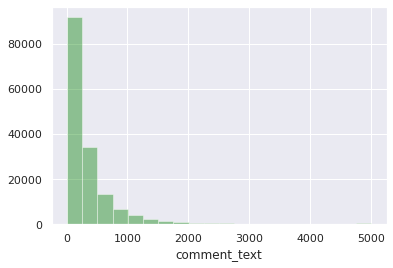

In [17]:
sns.set(color_codes=True)
comment_longitud = train.comment_text.str.len()
sns.distplot(comment_longitud, kde=False, bins=20, color="green")

In [18]:
train_labels = train[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']]
label_contador = train_labels.sum()
label_contador

toxic            15294
severe_toxic      1595
obscene           8449
threat             478
insult            7877
identity_hate     1405
dtype: int64

<AxesSubplot:title={'center':'Frecuencia de etiquetas'}>

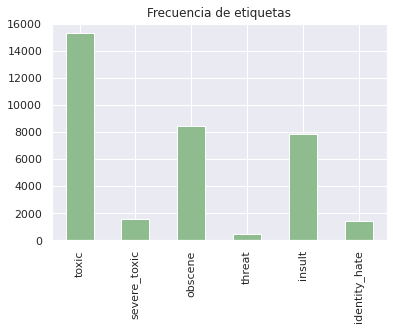

In [19]:
label_contador.plot(kind='bar', title='Frecuencia de etiquetas', color='darkseagreen')

In [20]:
barras1 = [sum(train['toxic'] == 1), sum(train['severe_toxic'] == 1), sum(train['obscene'] == 1), sum(train['threat'] == 1), sum(train['insult'] == 1),
         sum(train['identity_hate'] == 1)]

barras2 = [sum(train['toxic'] == 0), sum(train['severe_toxic'] == 0), sum(train['obscene'] == 0), sum(train['threat'] == 0), sum(train['insult'] == 0),
         sum(train['identity_hate'] == 0)]

print(barras1)
print(barras2)

[15294, 1595, 8449, 478, 7877, 1405]
[144277, 157976, 151122, 159093, 151694, 158166]


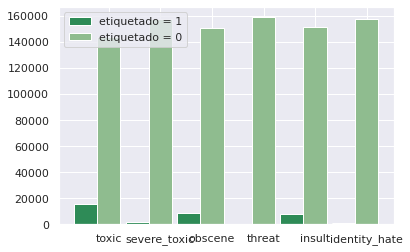

In [21]:
barraWidth = 0.45
r1 = np.arange(len(barras1))
r2 = [x + barraWidth for x in r1]

plt.bar(r1, barras1, color='seagreen', width=barraWidth, label='etiquetado = 1')
plt.bar(r2, barras2, color='darkseagreen', width=barraWidth, label='etiquetado = 0')

plt.xticks([r + barraWidth for r in range(len(barras1))],train_labels)
plt.legend()
plt.show()

In [22]:
train.comment_text[0]

"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"

In [23]:
train[train.toxic == 1].iloc[1, 1]

'Hey... what is it..\n@ | talk .\nWhat is it... an exclusive group of some WP TALIBANS...who are good at destroying, self-appointed purist who GANG UP any one who asks them questions abt their ANTI-SOCIAL and DESTRUCTIVE (non)-contribution at WP?\n\nAsk Sityush to clean up his behavior than issue me nonsensical warnings...'

<AxesSubplot:>

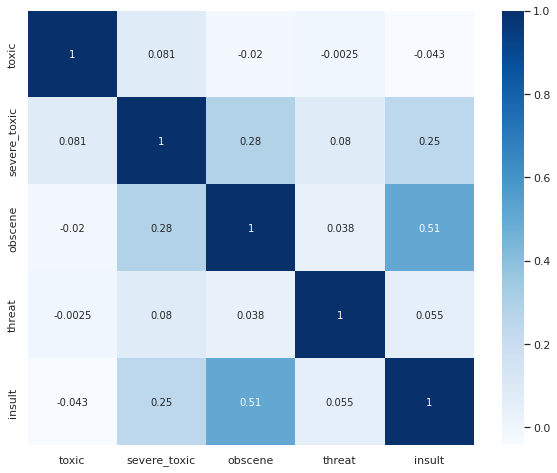

In [24]:
# Matriz de correlación cruzada entre etiquetas
fila_suma = train.iloc[:, 2:].sum(axis=1)
temp = train.iloc[:, 2:-1]
train_correlacion = temp[fila_suma > 0]
correlacion = train_correlacion.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlacion,
            xticklabels=correlacion.columns.values,
            yticklabels=correlacion.columns.values, annot=True, cmap="Blues")

In [25]:
def word_cloud(token):
    """
    Visualizamos las palabras más comunes que contribuyen al token.
    """
    token_contexto = train[train[token] == 1]
    token_texto = token_contexto.comment_text
    texto = pd.Series(token_texto).str.cat(sep=' ')
    wordcloud = WordCloud(width=1600, height=800,
                          max_font_size=200).generate(texto)

    plt.figure(figsize=(15, 10))
    plt.imshow(wordcloud.recolor(colormap="Oranges"), interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Palabras asociadas con la etiqueta {token} en el commentario", size=20)
    plt.show()

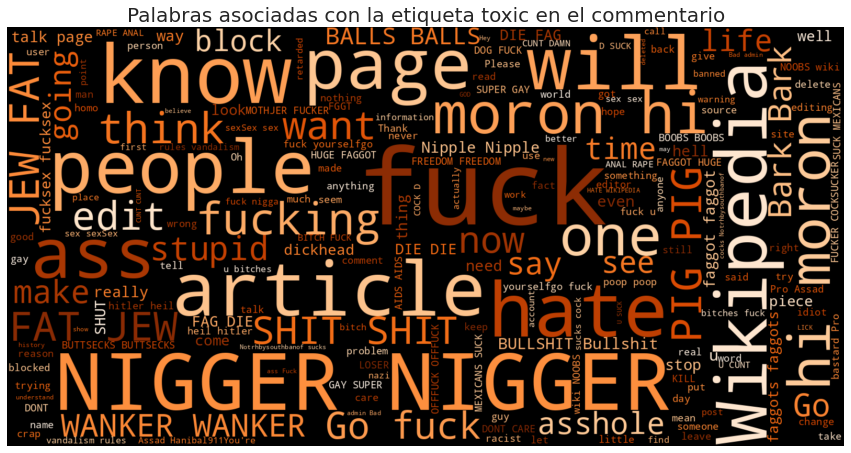

In [26]:
token = "toxic"
word_cloud(token)

# Ingenieria de Caracteristicas

In [27]:
import re
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem.wordnet import WordNetLemmatizer

import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_auc_score, roc_curve
from sklearn.metrics import hamming_loss
from sklearn.model_selection import cross_val_score
from sklearn.metrics import fbeta_score
from statistics import mean

from sklearn.pipeline import Pipeline
from timeit import default_timer as timer

[nltk_data] Downloading package wordnet to /home/omar/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/omar/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [28]:
test_labels = ["toxic", "severe_toxic", "obscene",
               "threat", "insult", "identity_hate"]

In [29]:
def tokenize(texto):
    '''
    Tokenizamos el texto y devolvemos una lista no única de palabras tokenizadas que se encuentran en el texto. 
    Normalizamos a minúsculas, eliminamos puntuación, eliminamos stop words, filtramos caracteres que no son ascii.
    Lematice las palabras y, por último, elimine las palabras de longitud < 3.
    '''
    texto = texto.lower()
    regex = re.compile('[' + re.escape(string.punctuation) + '0-9\\r\\t\\n]')
    no_signos_puntacion = regex.sub(" ", texto)
    palabras = no_signos_puntacion.split(' ')
    # remove any non ascii
    palabras = [word.encode('ascii', 'ignore').decode('ascii') for word in palabras]
    lematizador = WordNetLemmatizer()
    palabras = [lematizador.lemmatize(w) for w in palabras]
    palabras = [w for w in palabras if len(w) > 2]
    return palabras

In [30]:
vector = TfidfVectorizer(ngram_range=(1, 1), analyzer='word',
                         tokenizer=tokenize, stop_words='english',
                         strip_accents='unicode', use_idf=1, min_df=10)
X_train = vector.fit_transform(train['comment_text'])
X_test = vector.transform(test['comment_text'])

In [31]:
test['comment_text']

0                                                                                                                                             Yo bitch Ja Rule is more succesful then you'll ever be whats up with you and hating you sad mofuckas...i should bitch slap ur pethedic white faces and get you to kiss my ass you guys sicken me. Ja rule is about pride in da music man. dont diss that shit on him. and nothin is wrong bein like tupac he was a brother too...fuckin white boys get things right next time.,
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                        == From RfC == \n\n The title is 

In [32]:
type(test['comment_text'])

pandas.core.series.Series

In [33]:
vector.get_feature_names()[0:20]

/home/omar/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['aaa',
 'aap',
 'aardvark',
 'aaron',
 'aba',
 'abandon',
 'abandoned',
 'abandoning',
 'abandonment',
 'abbas',
 'abbey',
 'abbott',
 'abbreviated',
 'abbreviation',
 'abc',
 'abcnews',
 'abd',
 'abducted',
 'abduction',
 'abdul']

In [34]:
# Creamos un clasificador con parametros iniciales por defecto.
clasificador1 = MultinomialNB()
clasificador2 = LogisticRegression()
clasificador3 = LinearSVC()

In [36]:
def cross_validation_score(classifier, X_train, y_train):
    '''
    Iteramos a través de cada etiqueta y devolver la validación cruzada F1 y la puntuación de recuperación
    '''
    metodos = []
    nombre = classifier.__class__.__name__.split('.')[-1]

    for label in test_labels:
        recall = cross_val_score(
            classifier, X_train, y_train[label], cv=10, scoring='recall')
        f1 = cross_val_score(classifier, X_train,
                             y_train[label], cv=10, scoring='f1')
        metodos.append([nombre, label, recall.mean(), f1.mean()])

    return metodos

In [37]:
# Cálculamos la validación cruzada F1 y Recall score para nuestros 3 modelos de referencia.
metodo1_validacion_cruzada = pd.DataFrame(cross_validation_score(clasificador1, X_train, train))
metodo2_validacion_cruzada = pd.DataFrame(cross_validation_score(clasificador2, X_train, train))
metodo3_validacion_cruzada = pd.DataFrame(cross_validation_score(clasificador3, X_train, train))

/home/omar/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/omar/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
 

In [38]:
# Creamos un dataframe para mostrar un resumen de resultados.
metodos_validacion_cruzadads_cv = pd.concat([metodo1_validacion_cruzada, metodo2_validacion_cruzada, metodo3_validacion_cruzada])
metodos_validacion_cruzadads_cv.columns = ['Modelo', 'Label', 'Recall', 'F1']
metodo_validacion_cruzada = metodos_validacion_cruzadads_cv.reset_index()
metodo_validacion_cruzada[['Modelo', 'Label', 'Recall', 'F1']]

,Modelo,Label,Recall,F1
0,MultinomialNB,toxic,0.482999,0.636562
1,MultinomialNB,severe_toxic,0.021938,0.042244
2,MultinomialNB,obscene,0.469167,0.622148
3,MultinomialNB,threat,0.000000,0.000000
4,MultinomialNB,insult,0.367020,0.511394
5,MultinomialNB,identity_hate,0.007832,0.015346
6,LogisticRegression,toxic,0.610565,0.731388
7,LogisticRegression,severe_toxic,0.256431,0.351530
8,LogisticRegression,obscene,0.637002,0.747363
9,LogisticRegression,threat,0.123316,0.206632


# Modelado y Evaluación

In [41]:
def score(classifier, X_train, y_train, X_test, y_test):
    """
    Calculamos Hamming-loss, F1, Recall para cada label sobre el test dataset.
    """
    metodos = []
    hloss = []
    nombre = classifier.__class__.__name__.split('.')[-1]
    predict_df = pd.DataFrame()
    predict_df['id'] = test_y['id']

    for label in test_labels:
        classifier.fit(X_train, y_train[label])
        predicted = classifier.predict(X_test)

        predict_df[label] = predicted

        recall = recall_score(y_test[y_test[label] != -1][label],
                              predicted[y_test[label] != -1],
                              average="weighted")
        f1 = f1_score(y_test[y_test[label] != -1][label],
                      predicted[y_test[label] != -1],
                      average="weighted")

        confusion_matriz = confusion_matrix(y_test[y_test[label] != -1][label],
                                    predicted[y_test[label] != -1])

        metodos.append([nombre, label, recall, f1, confusion_matriz])

    hamming_loss_score = hamming_loss(test_y[test_y['toxic'] != -1].iloc[:, 1:7],
                                      predict_df[test_y['toxic'] != -1].iloc[:, 1:7])
    hloss.append([nombre, hamming_loss_score])

    return hloss, metodos

In [42]:
# Calculamos el Hamming-loss F1 y Recall score para nuestros 3 modelos de referencia.
h1, metodos1 = score(clasificador1, X_train, train, X_test, test_y)
h2, metodos2 = score(clasificador2, X_train, train, X_test, test_y)
h3, metodos3 = score(clasificador3, X_train, train, X_test, test_y)

/home/omar/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [48]:
# Creamos un dataframe para mostrar los resultados.
metodos1 = pd.DataFrame(metodos1)
metodos2 = pd.DataFrame(metodos2)
metodos3 = pd.DataFrame(metodos3)
metodos = pd.concat([metodos1, metodos2, metodos3])
metodos.columns = ['Modelo', 'Label', 'Recall', 'F1', 'Confusion_Matrix']
metodo = metodos.reset_index()
metodo[['Modelo', 'Label', 'Recall', 'F1']]

,Modelo,Label,Recall,F1
0,MultinomialNB,toxic,0.935196,0.930919
1,MultinomialNB,severe_toxic,0.994436,0.992145
2,MultinomialNB,obscene,0.962987,0.957902
3,MultinomialNB,threat,0.996702,0.995056
4,MultinomialNB,insult,0.960158,0.953453
5,MultinomialNB,identity_hate,0.988887,0.983408
6,LogisticRegression,toxic,0.935728,0.937031
7,LogisticRegression,severe_toxic,0.993123,0.992762
8,LogisticRegression,obscene,0.965957,0.964267
9,LogisticRegression,threat,0.996530,0.995725


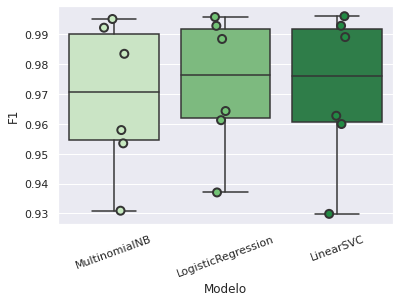

In [49]:
# Visualizamos los resultados de F1 score mediante box-plot.
ax = sns.boxplot(x='Modelo', y='F1', data=metodos, palette="Greens")
sns.stripplot(x='Modelo', y='F1', data=metodos,
              size=8, jitter=True, edgecolor="gray", linewidth=2, palette="Greens")
ax.set_xticklabels(ax.get_xticklabels(), rotation=20)

plt.show()

# Visualización del rendimiento para cada clasificador en cada categoría

Plot para Multinomial Naive Bayes


<AxesSubplot:title={'center':'Metricas'}, xlabel='Label'>

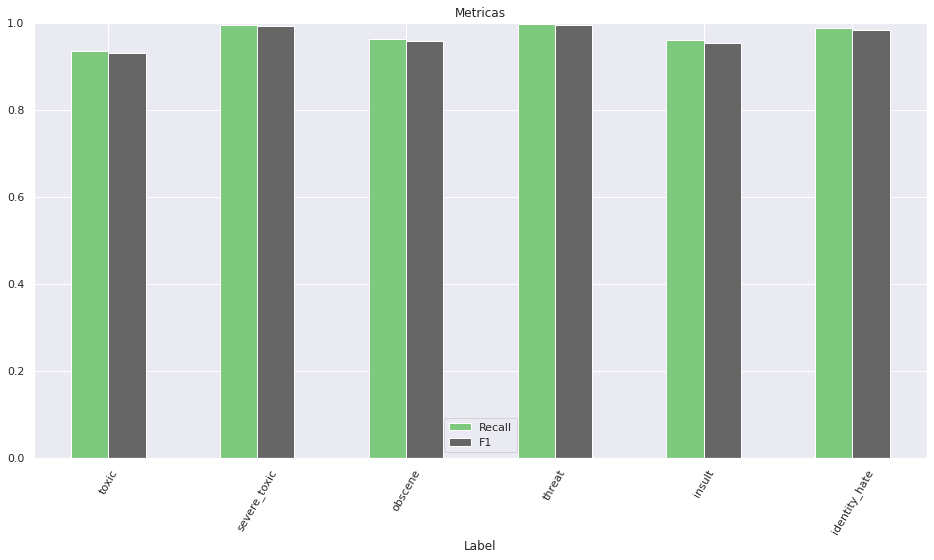

In [50]:
# Code para crear un grafico de barras de F1 y Recall a través de cada label para Multinomial Naive Bayes
print("Plot para Multinomial Naive Bayes")
m2 = metodos[metodos.Modelo == 'MultinomialNB']

m2.set_index(["Label"], inplace=True)
%matplotlib inline
m2.plot(figsize=(16, 8), kind='bar', title='Metricas',
        rot=60, ylim=(0.0, 1), colormap='Accent')

Plot para Logistic Regression


<AxesSubplot:title={'center':'Metrics'}, xlabel='Label'>

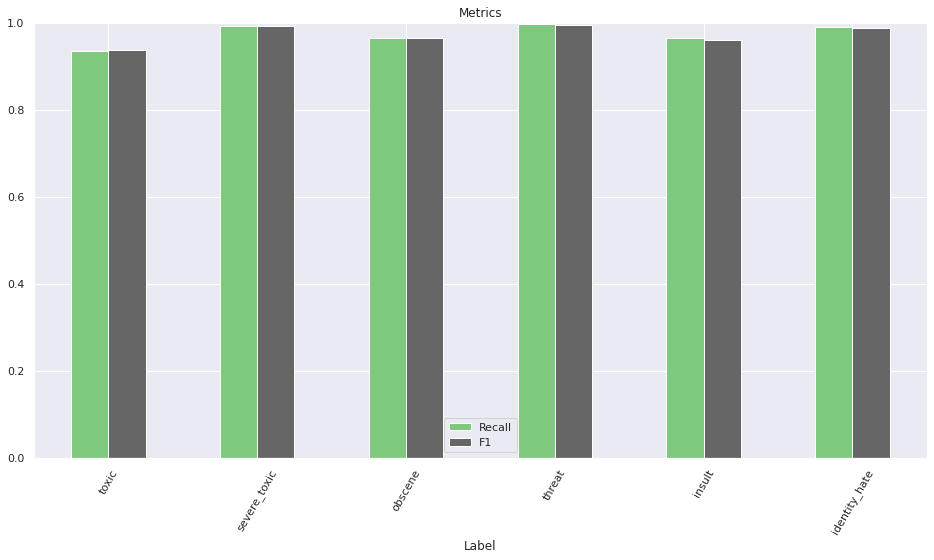

In [51]:
# Code para crear un grafico de barras de F1 y Recall a través de cada label para Logistic Regression
print("Plot para Logistic Regression")
m2 = metodos[metodos.Modelo == 'LogisticRegression']

m2.set_index(["Label"], inplace=True)
%matplotlib inline
m2.plot(figsize=(16, 8), kind='bar', title='Metrics',
        rot=60, ylim=(0.0, 1), colormap='Accent')

Plot para Linear SVC


<AxesSubplot:title={'center':'Metrics'}, xlabel='Label'>

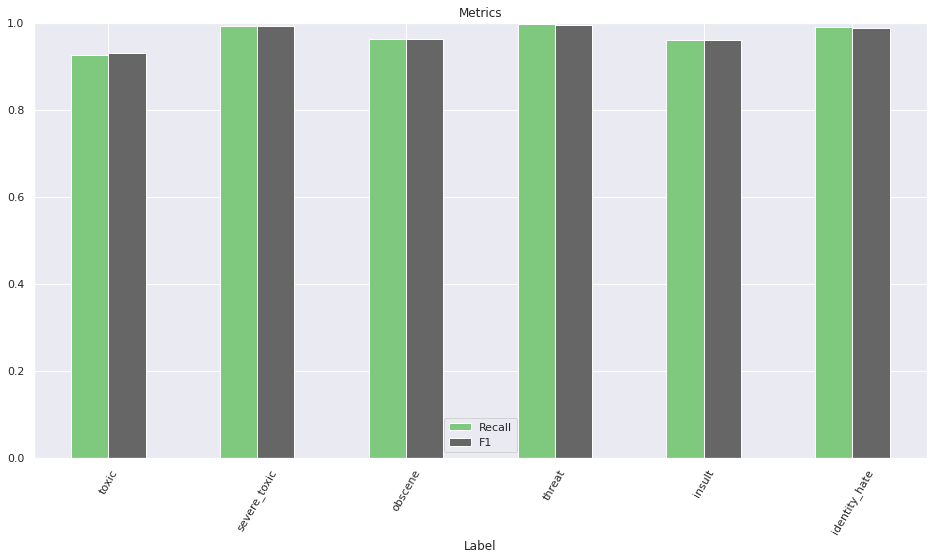

In [52]:
# Code para crear un grafico de barras de F1 y Recall a través de cada label para Linear SVC
print("Plot para Linear SVC")
m2 = metodos[metodos.Modelo == 'LinearSVC']

m2.set_index(["Label"], inplace=True)
%matplotlib inline
m2.plot(figsize=(16, 8), kind='bar', title='Metrics',
        rot=60, ylim=(0.0, 1), colormap='Accent')

## Visualización de la Matriz de Confusión

In [53]:
def drawConfusionMatrix(cm):
    """
    Plot de la Matriz de Confusion.
    """
    cm = cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
    ax = plt.axes()
    sns.heatmap(cm,
                annot=True,
                annot_kws={"size": 16},
                cmap="Greens",
                fmt='.2f',
                linewidths=2,
                linecolor='black',
                xticklabels=("Non-toxic", "Toxic"),
                yticklabels=("Non-toxic", "Toxic"))

    plt.ylabel('True', fontsize=18)
    plt.xlabel('Prediccion', fontsize=18)
    plt.show()

In [55]:
def Matrix(label):
    """
    Plot de la Matriz de Confusion para cada label llamando a la funcion drawConfusionMatrix().
    """
    print(f"*************** Etiqueta {label} ***************")
    labels = {"toxic": 0, "severe_toxic": 1, "obscene": 2,
              "threat": 3, "insult": 4, "identity_hate": 5}

    pos = labels[label]
    for i in range(pos, len(metodo), 6):
        print()
        print(f"****  {metodo['Modelo'][i]}  ***")
        cm = metodo['Confusion_Matrix'][i]
        drawConfusionMatrix(cm)

*************** Etiqueta toxic ***************

****  MultinomialNB  ***


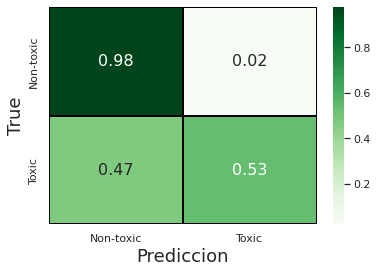


****  LogisticRegression  ***


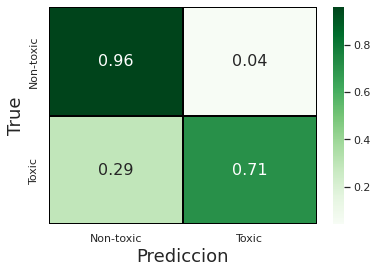


****  LinearSVC  ***


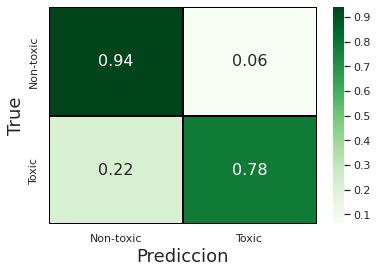

In [56]:
Matrix('toxic')

*************** Etiqueta identity_hate ***************

****  MultinomialNB  ***


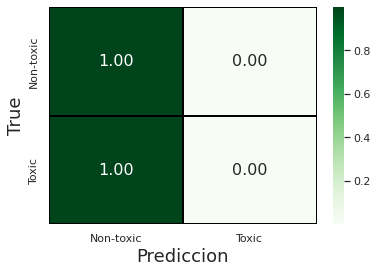


****  LogisticRegression  ***


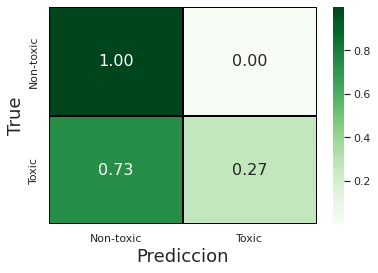


****  LinearSVC  ***


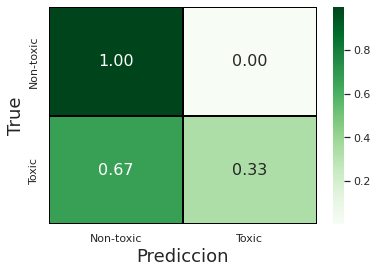

In [57]:
Matrix('identity_hate')

*************** Etiqueta severe_toxic ***************

****  MultinomialNB  ***


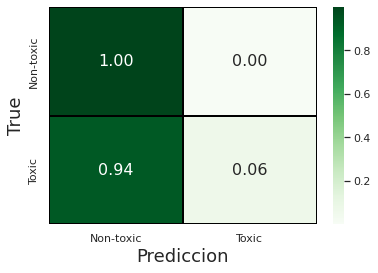


****  LogisticRegression  ***


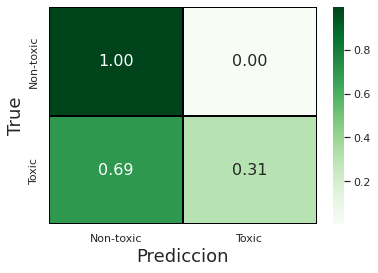


****  LinearSVC  ***


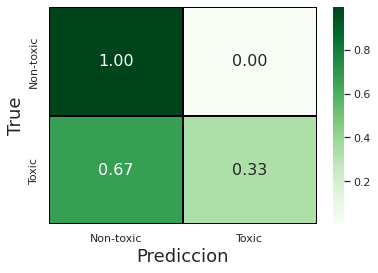

In [58]:
Matrix("severe_toxic")

##  Hamming Loss Score Aggregado

In [60]:
# Creando un dataframe para sumarizar Hamming-loss
hl1_df = pd.DataFrame(h1)
hl2_df = pd.DataFrame(h2)
hl3_df = pd.DataFrame(h3) 

In [61]:
hammingloss = pd.concat([hl1_df, hl2_df, hl3_df])
hammingloss.columns = ['Modelo', 'Hamming_Loss']
hl = hammingloss.reset_index()
hl[['Modelo', 'Hamming_Loss']]

,Modelo,Hamming_Loss
0,MultinomialNB,0.026939
1,LogisticRegression,0.025670
2,LinearSVC,0.028476


## Pipelines

In [62]:
pipe_lr = Pipeline([
    ('lr', LogisticRegression(class_weight="balanced"))
])

pipe_linear_svm = Pipeline([
    ('svm', LinearSVC(class_weight={1: 20}))
])

pipelines = [pipe_lr, pipe_linear_svm]

In [63]:
score_df = []
for pipe in pipelines:
    f1_values = []
    recall_values = []
    hl = []
    training_time = []
    predict_df = pd.DataFrame()
    predict_df['id'] = test_y['id']
    for label in test_labels:
        start = timer()
        pipe.fit(X_train, train[label])
        train_time = timer() - start
        predicted = pipe.predict(X_test)
        predict_df[label] = predicted

        f1_values.append(f1_score(
            test_y[test_y[label] != -1][label], predicted[test_y[label] != -1], average="weighted"))
        recall_values.append(recall_score(
            test_y[test_y[label] != -1][label], predicted[test_y[label] != -1], average="weighted"))
        training_time.append(train_time)
        name = pipe.steps[-1][1].__class__.__name__.split('.')[-1]

    hamming_loss_score = hamming_loss(
        test_y[test_y['toxic'] != -1].iloc[:, 1:7], predict_df[test_y['toxic'] != -1].iloc[:, 1:7])

    val = [name, mean(f1_values), mean(recall_values),
           hamming_loss_score, mean(training_time)]
    score_df.append(val)

/home/omar/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/omar/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
 

In [64]:
scores = pd.DataFrame(score_df,)
scores.columns = ['Modelo', 'F1', 'Recall', 'Hamming_Loss', 'Tiempo_Entrenamiento']
scores

,Modelo,F1,Recall,Hamming_Loss,Training_Time
0,LogisticRegression,0.947931,0.934068,0.065932,4.369502
1,LinearSVC,0.951508,0.941634,0.058366,5.777095


## Ajuste de hiperparámetros con Grid Search

In [65]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

### Logistic Regression Tuning

In [66]:
LRC = LogisticRegression()

parameter_grid = {'solver': ['newton-cg', 'lbfgs', 'liblinear'],
                  'class_weight': [None, 'balanced']}

cross_validation = StratifiedKFold(n_splits=5)

grid_search = GridSearchCV(LRC,
                           param_grid=parameter_grid,
                           cv=cross_validation,
                           scoring='f1')

grid_search.fit(X_train, train['toxic'])

print('Mejores Parametros: {}'.format(grid_search.best_params_))

grid_search.best_estimator_

/home/omar/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/omar/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
 

Mejores Parametros: {'class_weight': None, 'solver': 'liblinear'}


LogisticRegression(solver='liblinear')

### SVM Clasificador Afinado

In [67]:
LSVMC = LinearSVC()

parameter_grid = {'class_weight': [None, 'balanced'],
                  'C': [1, 5, 10]}

cross_validation = StratifiedKFold(n_splits=5)

grid_search = GridSearchCV(LSVMC,
                           param_grid=parameter_grid,
                           cv=cross_validation,
                           scoring='f1')

grid_search.fit(X_train, train['toxic'])

print('Mejores parametros: {}'.format(grid_search.best_params_))

grid_search.best_estimator_

/home/omar/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/omar/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/omar/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/omar/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/omar/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/omar/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to conver

Best parameters: {'C': 1, 'class_weight': None}


LinearSVC(C=1)

### Seleccion del Modelo

In [68]:
svm_clf = LinearSVC(C=1)

lr_clf = LogisticRegression(solver='liblinear')

tunned_model_score_df = []
for model in [svm_clf, lr_clf]:
    f1_values = []
    recall_values = []
    hl = []
    training_time = []
    predict_df = pd.DataFrame()
    predict_df['id'] = test_y['id']

    for label in test_labels:
        inicio = timer()
        model.fit(X_train, train[label])
        training_time.append(timer() - inicio)
        predicted = model.predict(X_test)
        predict_df[label] = predicted

        f1_values.append(f1_score(test_y[test_y[label] != -1][label],
                                  predicted[test_y[label] != -1],
                                  average="weighted"))
        recall_values.append(recall_score(test_y[test_y[label] != -1][label],
                                          predicted[test_y[label] != -1],
                                          average="weighted"))
        name = model.__class__.__name__

        

    hamming_loss_score = hamming_loss(test_y[test_y['toxic'] != -1].iloc[:, 1:7],
                                      predict_df[test_y['toxic'] != -1].iloc[:, 1:7])

    val = [name, mean(f1_values), mean(recall_values),
           hamming_loss_score, sum(training_time)]

    tunned_model_score_df.append(val)

In [70]:
tunned_scores = pd.DataFrame(tunned_model_score_df,)
tunned_scores.columns = ['Modelo', 'F1',
                         'Recall', 'Hamming_Loss', 'Tiempo_Entrenamiento']
tunned_scores

,Modelo,F1,Recall,Hamming_Loss,Traing_Time
0,LinearSVC,0.971706,0.971524,0.028476,3.817785
1,LogisticRegression,0.973220,0.974325,0.025675,6.714946


# Prueba Simple

In [101]:

single = {'1': "You're an idiot"}
single_test = pd.Series(data=single, index=['1'])
single_test

1    You're an idiot
dtype: object

In [102]:
S_test = vector.transform(single_test)

In [103]:
s_predict = svm_clf.predict(S_test)
s_predict

array([0])

In [104]:
svm_clf = LinearSVC(C=1)

lr_clf = LogisticRegression(solver='liblinear')

tunned_model_score_df = []
for model in [svm_clf, lr_clf]:
    f1_values = []
    recall_values = []
    hl = []
    training_time = []
    predict_df = pd.DataFrame()
    predict_df['id'] = test_y['id']

    for label in test_labels:
        start = timer()
        model.fit(X_train, train[label])
        training_time.append(timer() - start)
        predicted = model.predict(S_test)
        print("Modelo:" + model.__class__.__name__)
        print("Etiqueta: " + label)
        print("Predicción: ") 
        print(predicted)

        

        

   

Model:LinearSVC
Label: toxic
Predicted: 
[1]
Model:LinearSVC
Label: severe_toxic
Predicted: 
[0]
Model:LinearSVC
Label: obscene
Predicted: 
[1]
Model:LinearSVC
Label: threat
Predicted: 
[0]
Model:LinearSVC
Label: insult
Predicted: 
[1]
Model:LinearSVC
Label: identity_hate
Predicted: 
[0]
Model:LogisticRegression
Label: toxic
Predicted: 
[1]
Model:LogisticRegression
Label: severe_toxic
Predicted: 
[0]
Model:LogisticRegression
Label: obscene
Predicted: 
[1]
Model:LogisticRegression
Label: threat
Predicted: 
[0]
Model:LogisticRegression
Label: insult
Predicted: 
[1]
Model:LogisticRegression
Label: identity_hate
Predicted: 
[0]
